In [35]:
import pandas as pd
from pathlib import Path
import requests
from pprint import pprint
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import re
import math
from scipy.stats import linregress
from api_keys import sarah_weather_api_key

# Turns off warning messages
import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name 'sarah_weather_api_key' from 'api_keys' (c:\Users\Sarah\OneDrive\Documents\GitHub\project-one\api_keys.py)

In [ ]:
# store and read csv files
covid19_path = Path("Resources/us_counties_covid19_daily.csv")
counties_path = Path("Resources/county_info_city.csv")

covidaily_df = pd.read_csv(covid19_path, encoding="ISO-8859-1")
counties_df = pd.read_csv(counties_path, encoding="ISO-8859-1")

In [ ]:
# display head
covidaily_df

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0
...,...,...,...,...,...,...
800432,2020-12-05,Sweetwater,Wyoming,56037.0,2098,10.0
800433,2020-12-05,Teton,Wyoming,56039.0,1739,2.0
800434,2020-12-05,Uinta,Wyoming,56041.0,1187,5.0
800435,2020-12-05,Washakie,Wyoming,56043.0,519,8.0


In [ ]:
avg_2020_df = covidaily_df.groupby(by=["date"]).mean() 
avg_2020_df = avg_2020_df.reset_index()


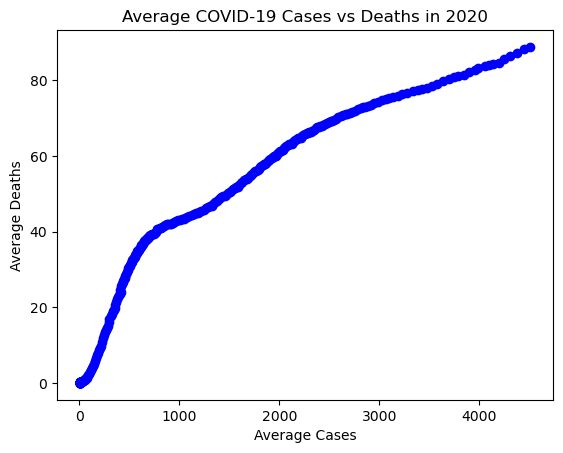

In [ ]:
# Build scatter plot for avg cases vs death in 2020
x_axis = avg_2020_df["cases"]
y_axis = avg_2020_df["deaths"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", color="blue")

plt.title("Average COVID-19 Cases vs Deaths in 2020")
plt.xlabel("Average Cases")
plt.ylabel("Average Deaths")

# Show plot
plt.show()

In [ ]:
# filter & create data frame with my season(Spring)
beg_spring = "2020-02-29"
end_spring = "2020-06-01"
spring_filtered = (covidaily_df["date"] > beg_spring)&(covidaily_df["date"] < end_spring)
covidSP_df = covidaily_df.loc[spring_filtered]
# display covid spring df
covidSP_df

,date,county,state,fips,cases,deaths
398,2020-03-01,Maricopa,Arizona,4013.0,1,0.0
399,2020-03-01,Alameda,California,6001.0,1,0.0
400,2020-03-01,Humboldt,California,6023.0,1,0.0
401,2020-03-01,Los Angeles,California,6037.0,1,0.0
402,2020-03-01,Marin,California,6041.0,1,0.0
...,...,...,...,...,...,...
196845,2020-05-31,Sweetwater,Wyoming,56037.0,30,0.0
196846,2020-05-31,Teton,Wyoming,56039.0,100,1.0
196847,2020-05-31,Uinta,Wyoming,56041.0,12,0.0
196848,2020-05-31,Washakie,Wyoming,56043.0,35,3.0


In [ ]:
# finding averages per date, county and state will not be there
spring_avgperdate_df = covidSP_df.groupby(by=["date"]).mean() 
spring_avgperdate_df 

,fips,cases,deaths
date,,,
2020-03-01,21051.320000,3.259259,0.111111
2020-03-02,21375.709677,3.151515,0.181818
2020-03-03,21389.181818,3.571429,0.285714
2020-03-04,23706.189189,4.128205,0.307692
2020-03-05,24465.212766,4.653061,0.244898
...,...,...,...
2020-05-27,31443.791074,559.702163,33.755294
2020-05-28,31429.500825,566.150801,34.101342
2020-05-29,31444.735594,572.869125,34.431346


In [ ]:
# reset index
spring_avgperdate_df = spring_avgperdate_df.reset_index()

In [ ]:
# counting number of counties per date
countiesperday_df =  covidSP_df.groupby(["date"]).count()["county"]
countiesperday_df

date
2020-03-01      27
2020-03-02      33
2020-03-03      35
2020-03-04      39
2020-03-05      49
              ... 
2020-05-27    3052
2020-05-28    3057
2020-05-29    3064
2020-05-30    3066
2020-05-31    3070
Name: county, Length: 92, dtype: int64

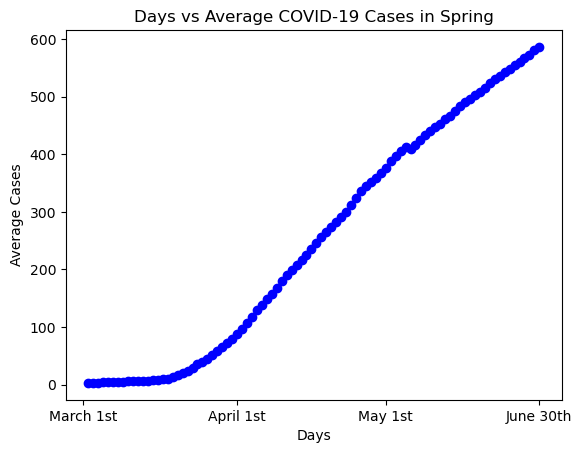

In [ ]:
# Build scatter plot for date vs avg cases
x_axis = np.array([i for i in range(1,93)])
y_axis = spring_avgperdate_df["cases"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.xticks([0, 31, 61, 92], ["March 1st", "April 1st", "May 1st", "June 30th"])

plt.title("Days vs Average COVID-19 Cases in Spring")
plt.xlabel("Days")
plt.ylabel("Average Cases")

# Show plot
plt.show()

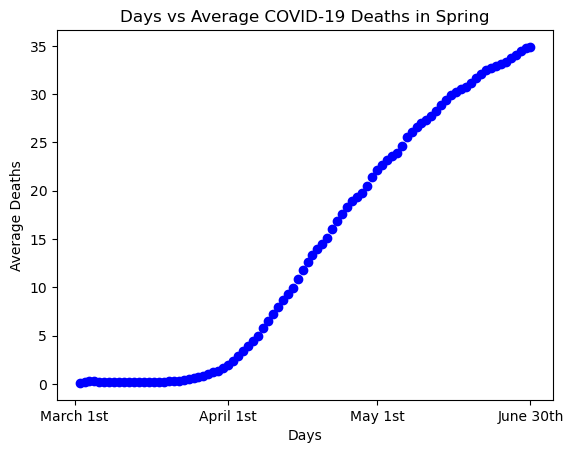

In [ ]:
# Build scatter plot for date vs death
x_axis = np.array([i for i in range(1,93)])
y_axis = spring_avgperdate_df["deaths"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", color="blue")
plt.xticks([0, 31, 61, 92], ["March 1st", "April 1st", "May 1st", "June 30th"])

plt.title("Days vs Average COVID-19 Deaths in Spring")
plt.xlabel("Days")
plt.ylabel("Average Deaths")

# Show plot
plt.show()

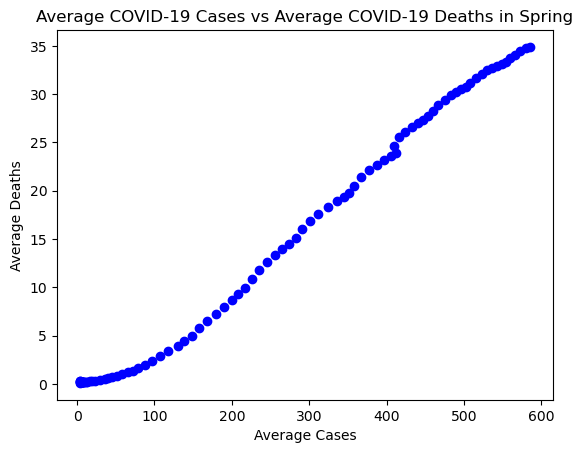

In [ ]:
# Build scatter plot for cases vs death 
x_axis = spring_avgperdate_df["cases"]
y_axis = spring_avgperdate_df["deaths"]

# Incorporate the other graph properties
plt.scatter(x_axis, y_axis, marker="o", color="blue")

plt.title("Average COVID-19 Cases vs Average COVID-19 Deaths in Spring")
plt.xlabel("Average Cases")
plt.ylabel("Average Deaths")

# Show plot
plt.show()

In [ ]:
# display date frame
counties_df

,State,County FIPS Code,County or Equivalent,Seat
0,Alabama,1001,Autauga County,Prattville
1,Alabama,1003,Baldwin County,Bay Minette
2,Alabama,1005,Barbour County,Clayton
3,Alabama,1007,Bibb County,Centreville
4,Alabama,1009,Blount County,Oneonta
...,...,...,...,...
3097,Wyoming,56039,Teton County,Jackson
3098,Wyoming,56039,Teton County,Jackson
3099,Wyoming,56041,Uinta County,Evanston
3100,Wyoming,56043,Washakie County,Worland


In [ ]:
# create a column for city(seat), and state counties dataframe
grab_cols = ["Seat", "State"]
counties_df["City, State"] = counties_df[grab_cols].apply(lambda row: ", ".join(row.values.astype(str)), axis=1)

counties_df.head()

,State,County FIPS Code,County or Equivalent,Seat,"City, State"
0,Alabama,1001,Autauga County,Prattville,"Prattville, Alabama"
1,Alabama,1003,Baldwin County,Bay Minette,"Bay Minette, Alabama"
2,Alabama,1005,Barbour County,Clayton,"Clayton, Alabama"
3,Alabama,1007,Bibb County,Centreville,"Centreville, Alabama"
4,Alabama,1009,Blount County,Oneonta,"Oneonta, Alabama"


In [ ]:
# Combining 3 chosen counties in dataframe
three_counties_df = counties_df.loc[counties_df["County FIPS Code"].isin([48201,int("04013"),53033])]
three_counties_df = three_counties_df.rename(columns = {'Seat':'City'})

lat_list = [33.481136, 29.749907, 47.608013]
lon_list = [-112.078232, -95.358421, -122.335167]
three_counties_df["Latitude"] = lat_list
three_counties_df["Longitude"] = lon_list

three_counties_df

,State,County FIPS Code,County or Equivalent,City,"City, State",Latitude,Longitude
92,Arizona,4013,Maricopa County,Phoenix,"Phoenix, Arizona",33.481136,-112.078232
2617,Texas,48201,Harris County,Houston,"Houston, Texas",29.749907,-95.358421
2926,Washington,53033,King County,Seattle,"Seattle, Washington",47.608013,-122.335167


In [ ]:
three_counties = three_counties_df["County or Equivalent"]
three_cities = three_counties_df["City, State"]
cities_list = []
for city in three_cities:
    cities_list.append(city)
print(cities_list)

['Phoenix, Arizona', 'Houston, Texas', 'Seattle, Washington']


In [ ]:
# setting weather URL for API
base_url = "https://api.openweathermap.org/data/3.0/onecall/timemachine?"
units = "metric"

# weather data for each city empty list
cities_temp = []
cities_humi = []
cities_wspd = [] 

for city in cities_list:
    temp = []
    humi = []
    wspd = []
    lat = three_counties_df.loc[three_counties_df["City, State"]==city, "Latitude"]
    lon = three_counties_df.loc[three_counties_df["City, State"]==city, "Longitude"]

    spring_dates = spring_avgperdate_df["date"].unique()
    for date in spring_dates:
        fixed_date = math.trunc(int(pd.Timestamp(date).timestamp()))
        
        # create url & request
        url = f"{base_url}lat={lat}&lon={lon}&dt={fixed_date}&units={units}&appid={sarah_weather_api_key}"
        response = requests.get(url).json()

        # append to lists for each date for a city
        temp.append(response["data"][0]["temp"])
        humi.append(response["data"][0]["humidity"])
        wspd.append(response["data"][0]["wind_speed"])

    #create a dictionary and append data for each city
    cities_temp.append({ city: temp})
    cities_humi.append({ city: humi})
    cities_wspd.append({ city: wspd})



NameError: name 'sarah_weather_api_key' is not defined